## Trent Rivers

Github link: https://github.com/trentbrivers/KaggleHistopathic

#### The Problem:

Cancer is a ubiquitous disease that millions are diagnosed with on a yearly basis. We can train models to assist us in accurately diagnosing cancer using images of human tissue. That is the objective of this assignment. A model needs to be capable of identifying a single pixel or more of cancer within the center 36x36 pixels of a 96x96 tiff image.

#### EDA & Analysis Plan

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"E:\Data\histopathologic-cancer-detection\train_labels.csv")

In [8]:
df.head(5)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


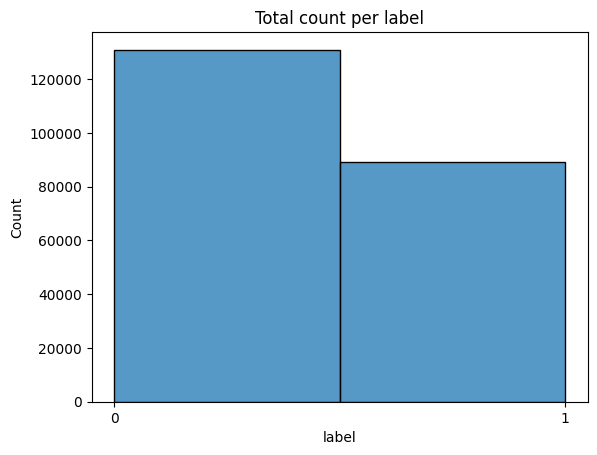

In [18]:
sns.histplot(data = df, x='label', stat = 'count', bins = 2).set(title="Total count per label")
plt.xticks(ticks=range(0, 2))  # Adjust range as needed
plt.show()

From the above, we can tell that there are more negative samples than positives. This will be an important point to reference when considering the model accuracy. It is worth noting that there are no images present in the dataset which have labels outside of 0 and 1. That would require cleaning. 

I've found that the ordering of the images and their labels do not match. My first step to preprocess the data is to align all of the labels with the corresponding images. This will become important when it comes to training. In doing this, I've found that there are no images which lack labels. If this occurred, that would require additional data cleaning. 

#### Architecture

I'm going to use a Keras Sequential model for this binary classification task. This is going to be a Convolution neural network because we're working with 2D images here, and convolution networks are more suited towards working with this kind of data. Since this will be a convolution model, the first layer of my sequential model will be a Conv2D layer, to process the input images before passing to the Dense network layers that follow. After the first convolution layer, I'm including two dense layers. The first has 64 neurons in it. Given the small size of our input images, I think 64 neurons may be sufficient to capture distinct features within the image. The layer will have l2 regularization on it to hopefully prevent overfitting the training set. There will be a second Dense layer with 32 neurons after the first. More layers stacked on top of one another allows the model to capture more complex nonlinear relationships between the neurons. Once again, this layer will have l2 regularization on it to prevent overfitting. To end, I have a Dense layer with 1 neuron, using the sigmoid activation function to assign the proper labels to the output. 

I'm going to train the model with 3 epochs and a batch size of 16. In some previous tests I've conducted using Keras, this combination seems to work well for binary classification training. 

In [ ]:
model = Sequential([
	Conv2D(96, (3,3), activation = "relu", input_shape = (96,96,3)),
	Flatten(),
	keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)), 
	keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
	keras.layers.Dense(1, activation='sigmoid') #Final binary output

])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, epochs=3, batch_size=16)

#### Results

![title](img/results.png)

Given that we have access to some 220000+ images in our training set, I wanted to conduct some experiments to see how well results on a smaller subset could generalize to the test set. As you can see above, the results are mediocre. The first model used with submission.csv was trained on only 10,000 images, in about 15 minutes. Scoring around 60% is admirable given how brief the training was and how small the sample size was; however, we can do much better.

The second model, used for submission2.csv, was trained on 50,000 images in 1.5 hours. There was an 8% increase in score, but at the cost of using 5x as much data. This still falls short of where I'd like performance to be. 

Given a bit more time, there are a number of ways in which performance could continue to be improved. For instance, the model was still trained on only a subset of the larger body of training data available. Using the current architecture and 6-8 hours of training time, the model could be expected to perform much better than it does at the moment. Additionally, there are a number of ways in which hyperparameters and the model architecture in use could be tuned to further boost performance. I never used a learning scheduler for the model, and I could see that there was a point when model accuracy began to decrease as training continued. Decreasing the learning rate would allow the model to better locate the global minimum. The batch size and epoch number are two hyperparameters that could further be tuned to improve the model; however, adding additional epochs and decreasing the batch size severely increasing the training time needed. 

What's disappointing about this experiment is that we have no access to the proper labels for the test set. This means that no confusion matrix or plots can be made to compare performance with expectations. All we have access to is the scores seen above. 

#### Conclusion

I'm glad that I was able to train a model that achieved around 69% accuracy. That does leave substantial room for improvement, however. As noted above, there are a multitude of ways in which the model could be further tuned and refined to better perform on this binary classification task.

I found this to be an illuminating assignment. Even most humans can not expect to accurately identify cancer from an image 70% of the time, so reaching that level with a model that still has so much room for improvement is excellent. This was also my first time using machine learning in a computer vision context - all of my previous work has been in natural language processing. I'm encouraged by the promise artificial intelligence has in healthcare applications like the sort we see here, and I'm interested to continue refining this model and taking on similar projects in the future. 